# Introdução às Redes Neurais Fisicamente Informadas - PINNs (Dia 06) Picture1.jpg

---
### Exemplo 10

**Objetivo:** Neste notebook vamos explorar algumas das possibilidades distintas de construção de geometrias.




---
Instala o PaddlePaddle e o DeepXDE

In [ ]:
# instala e carrega o paddlepaddle e o deepxde
!pip install paddlepaddle-gpu==2.6.0.post120 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
!pip install deepxde -q gwpy

Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.0/788.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.7/183.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.9 MB/s eta 0:00:00


---
Carrega o DeepXDE e muda o backend para o PaddlePaddle.

In [ ]:
# Troca o backend para o PaddlePaddle
import os
os.environ['DDE_BACKEND'] = 'paddle'

import deepxde as dde

# Troca o tipo de ponto flutuante para 64 bit, originalmente é 32 bit (essa alteração é necessária)
dde.config.set_default_float('float64')

import numpy as np

# Caso precise usar alguma função específica do paddle (não é o caso deste notebook)
import paddle
# Exemplo: caso precise usar um seno, deve-se usar paddle.sin(...)

Using backend: paddle
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, jax.
paddle supports more examples now and is recommended.


Set the default float type to float64


---
**Exemplo 10.1:** Será tratado o caso da construção de uma geometria poligonal.

Começamos definindo a função da perda relacionada à equação diferencial

Poisson: $-\Delta u = 1$.

In [ ]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    return - dy_xx - dy_yy - 1

---
Nosso domínio inicial $D$ será em formato de L com condição de contorno de Dirichlet $\partial D = 0$.

Definiremos o domínio em formato de L usando o módulo `dde.geometry.Polygon(...)` cujas entradas são os vértices do polígono.

Perceba que os vértices são distribuídos de tal forma que eles deem a volta do início ao fim.

In [ ]:
def boundary(_, on_boundary):
    return on_boundary

geom = dde.geometry.Polygon([[0, 0], [1, 0], [1, -1], [-1, -1], [-1, 1], [0, 1]])
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

---
Cria e compila a rede neural

Compiling model...
'compile' took 0.000829 s

Training model...

Step      Train loss              Test loss               Test metric
0         [9.63e-01, 1.53e-03]    [9.57e-01, 1.53e-03]    []  
1000      [3.55e-04, 2.85e-03]    [2.85e-04, 2.85e-03]    []  
2000      [2.22e-04, 2.34e-03]    [1.60e-04, 2.34e-03]    []  
3000      [2.65e-04, 1.89e-03]    [1.81e-04, 1.89e-03]    []  
4000      [3.42e-04, 1.41e-03]    [2.43e-04, 1.41e-03]    []  
5000      [2.11e-04, 7.46e-04]    [1.73e-04, 7.46e-04]    []  
6000      [1.69e-04, 4.00e-04]    [1.43e-04, 4.00e-04]    []  
7000      [1.33e-04, 2.60e-04]    [1.06e-04, 2.60e-04]    []  
8000      [1.19e-03, 7.84e-04]    [1.08e-03, 7.84e-04]    []  
9000      [8.33e-05, 1.52e-04]    [6.53e-05, 1.52e-04]    []  
10000     [6.75e-05, 1.35e-04]    [5.55e-05, 1.35e-04]    []  

Best model at step 10000:
  train loss: 2.02e-04
  test loss: 1.90e-04
  test metric: []

'train' took 103.691663 s

Compiling model...
'compile' took 0.000278 s

Training

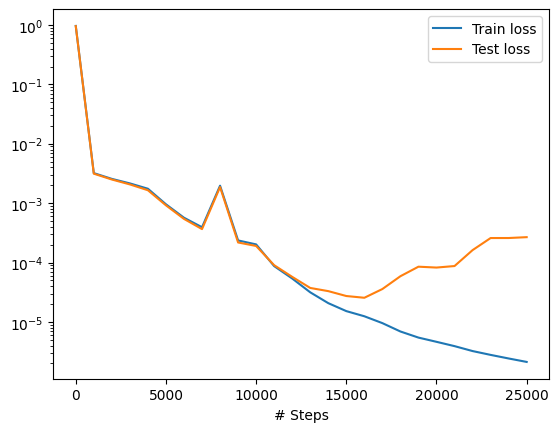

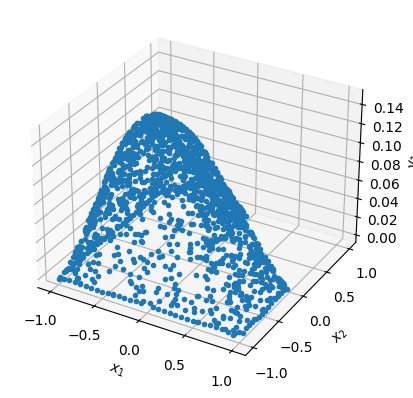

In [ ]:
data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.0005)
losshistory, train_state = model.train(iterations=10000)
model.compile("L-BFGS")
model.train()
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

---
Imprime a solução no plano $x-y$

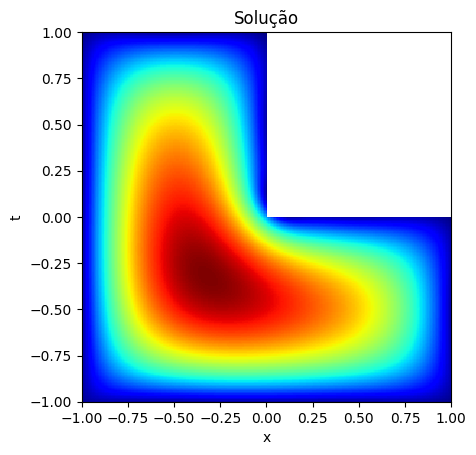

In [ ]:
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 256)
t = np.linspace(-1, 1, 256)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
prediction = model.predict(X_star, operator=None)

v = griddata(X_star, prediction[:, 0], (X, T), method="cubic")

fig, ax = plt.subplots()
ax.set_title("Solução")
ax.set_ylabel("t")
ax.set_xlabel("x")
mask = ((T > 0) & (X > 0))  # Dois retângulos formando um L
v[mask]=np.nan
ax.imshow(
    v,
    interpolation="nearest",
    cmap="jet",
    extent=[-1, 1, -1, 1],
    origin="lower",
    aspect="equal",
)
plt.show()

---
**Exemplo 10.2:** Será tratado o caso de uma geometria circular.

Nosso domínio $D$ agora será um disco de raio unitário com condição de contorno de Dirichlet $\partial D = 0$.

Definimos o domínio em formato de disco usando o módulo `dde.geometry.Disk(...)` cujas entradas são o centro e o raio.

In [ ]:
def boundary(_, on_boundary):
    return on_boundary

geom = dde.geometry.Disk([0, 0], 1)
bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

---
Cria e compila a rede neural

Compiling model...
'compile' took 0.000193 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.19e+00, 2.60e-01]    [1.18e+00, 2.60e-01]    []  
1000      [5.65e-05, 4.04e-06]    [4.66e-05, 4.04e-06]    []  
2000      [9.58e-06, 1.05e-06]    [7.77e-06, 1.05e-06]    []  
3000      [2.84e-06, 2.82e-07]    [2.39e-06, 2.82e-07]    []  
4000      [1.95e-06, 8.34e-08]    [1.66e-06, 8.34e-08]    []  
5000      [1.42e-06, 5.59e-08]    [1.22e-06, 5.59e-08]    []  
6000      [6.49e-06, 7.53e-04]    [5.44e-06, 7.53e-04]    []  
7000      [9.48e-05, 1.89e-05]    [9.74e-05, 1.89e-05]    []  
8000      [5.29e-07, 4.58e-07]    [4.20e-07, 4.58e-07]    []  
9000      [3.67e-07, 5.81e-08]    [2.84e-07, 5.81e-08]    []  
10000     [1.21e-06, 4.27e-07]    [1.23e-06, 4.27e-07]    []  
11000     [6.49e-07, 6.71e-08]    [6.37e-07, 6.71e-08]    []  
12000     [5.42e-06, 1.01e-07]    [5.49e-06, 1.01e-07]    []  
13000     [2.16e-07, 6.45e-08]    [1.72e-07, 6

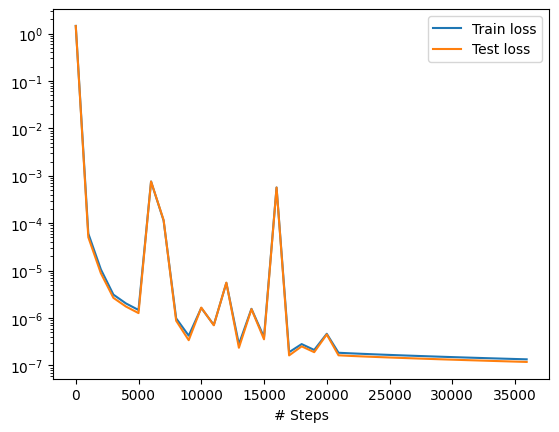

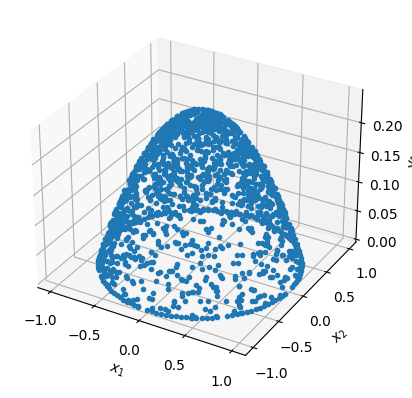

In [ ]:
data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=20000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

---
Imprime a solução no plano $x-y$

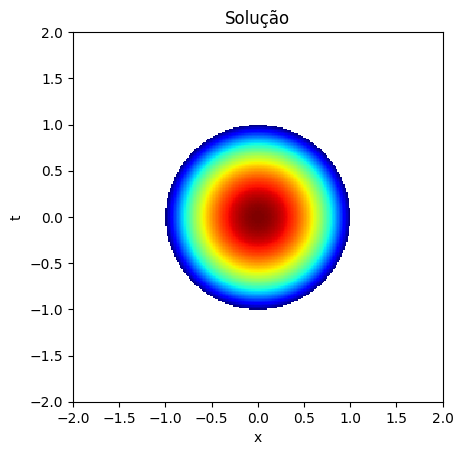

In [ ]:
x = np.linspace(-2, 2, 256)
t = np.linspace(-2, 2, 256)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
prediction = model.predict(X_star, operator=None)

v = griddata(X_star, prediction[:, 0], (X, T), method="cubic")

fig, ax = plt.subplots()
ax.set_title("Solução")
ax.set_ylabel("t")
ax.set_xlabel("x")
mask = (X**2+T**2<1)
v[~mask]=np.nan
ax.imshow(
    v,
    interpolation="nearest",
    cmap="jet",
    extent=[-2, 2, -2, 2],
    origin="lower",
    aspect="equal",
)
plt.show()

---
**Exemplo 10.3:** Será tratado o caso do operador de diferença de geometrias.

Finalmente, nosso último domínio $D$ será um quadrado furado por um disco de raio unitário com condição de contorno de Dirichlet $\partial D = 0$.

Definiremos o nosso domínio como sendo a diferença entre um retângulo e um disco. Para tal definiremos o limite externo do domínio como sendo `outer = dde.geometry.Rectangle([-2,-2],[2,2])` e o interno `inner = dde.geometry.Disk([0,0],1)`. Assim, a geometria é definida através da diferença `geom = outer - inner`.

In [ ]:
def boundary(_, on_boundary):
    return on_boundary

outer = dde.geometry.Rectangle([-2, -2], [2, 2])
inner = dde.geometry.Disk([0, 0], 1)

geom = outer - inner

bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary)

---
Cria e compila a rede neural

Compiling model...
'compile' took 0.000450 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.09e+00, 7.12e-02]    [1.01e+00, 7.12e-02]    []  
1000      [1.21e-04, 2.66e-04]    [1.24e-04, 2.66e-04]    []  
2000      [6.24e-05, 2.03e-04]    [6.09e-05, 2.03e-04]    []  
3000      [1.15e-04, 9.50e-04]    [9.28e-05, 9.50e-04]    []  
4000      [4.12e-05, 1.94e-04]    [3.85e-05, 1.94e-04]    []  
5000      [3.61e-05, 1.64e-04]    [3.43e-05, 1.64e-04]    []  
6000      [3.52e-05, 1.58e-04]    [3.39e-05, 1.58e-04]    []  
7000      [5.16e-05, 2.48e-04]    [4.55e-05, 2.48e-04]    []  
8000      [3.42e-05, 1.36e-04]    [3.35e-05, 1.36e-04]    []  
9000      [3.48e-05, 1.30e-04]    [3.40e-05, 1.30e-04]    []  
10000     [3.14e-05, 1.21e-04]    [3.17e-05, 1.21e-04]    []  
11000     [2.92e-05, 1.14e-04]    [2.94e-05, 1.14e-04]    []  
12000     [2.68e-05, 1.03e-04]    [2.71e-05, 1.03e-04]    []  
13000     [3.59e-05, 9.52e-05]    [3.39e-05, 9

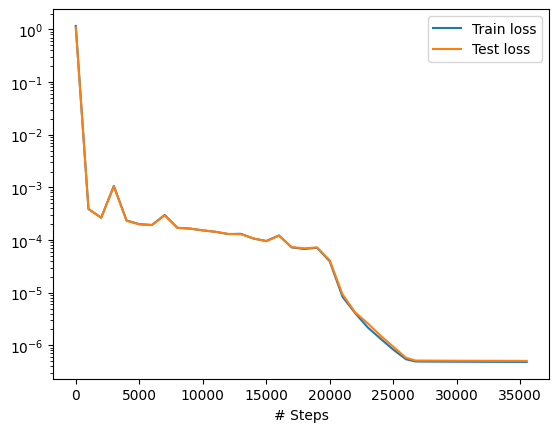

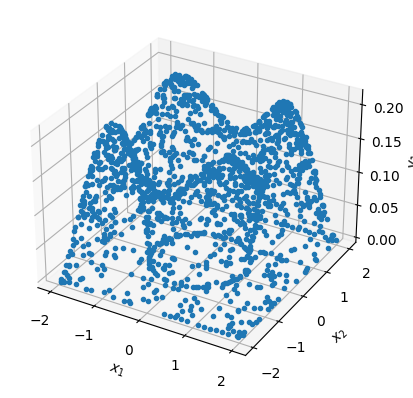

In [ ]:
data = dde.data.PDE(geom, pde, bc, num_domain=1200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [50] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
model.train(iterations=20000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=False, isplot=True)

---
Imprime a solução no plano $x-y$

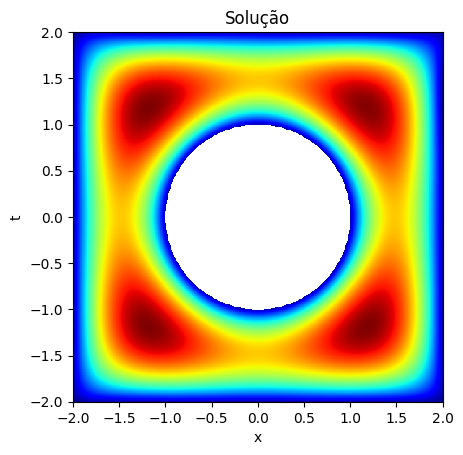

In [ ]:
x = np.linspace(-2, 2, 512)
t = np.linspace(-2, 2, 512)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
prediction = model.predict(X_star, operator=None)

v = griddata(X_star, prediction[:, 0], (X, T), method="cubic")

fig, ax = plt.subplots()
ax.set_title("Solução")
ax.set_ylabel("t")
ax.set_xlabel("x")
mask = ((X**2+T**2 < 1))
v[mask]=np.nan
ax.imshow(
    v,
    interpolation="nearest",
    cmap="jet",
    extent=[-2, 2, -2, 2],
    origin="lower",
    aspect="equal",
)
plt.show()

---
**Exemplo 10.4:** Será tratado o caso da geometria obtida através de uma nuvem de pontos (*point cloud*).

A geometria será representada por uma nuvem de pontos, ou seja, um conjunto de pontos no plano ou espaço fornecido pelo usuário através de um arquivo ou uma construção específica. Este é o caso quando não é possível definir uma geometria utilizando as possibilidade pré-determinadas pela biblioteca.

Este exemplo, em particular, irá construir uma nuvem de pontos dentro de um círculo de raio unitário e irá carregá-la utilizando o método `dde.geometry.PointCloud()`.

---
Primeiro vamos construir a nuvem de pontos.

In [ ]:
# constrói uma nuvem de pontos em formato circular
# ----------------------------------------------
theta = np.linspace(0, 2 * np.pi, 50) # np.linspace(min, max, no de divisoes do intervalo)
rmin = 0.0;
rmax = 1.0;
nsub = 30;
dr = (rmax-rmin)/20

x1 = dr * np.cos(theta)
y1 = dr * np.sin(theta)

x2 = 2 * dr * np.cos(theta)
y2 = 2 * dr * np.sin(theta)

x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))

for i in range(3, nsub+1):
  x1 = i * dr * np.cos(theta)
  y1 = i * dr * np.sin(theta)

  x = np.concatenate((x,x1))
  y = np.concatenate((y,y1))

print(x)

PC = np.array([x,y]).T # esta é a nuvem de pontos gerada

print(PC)
BP = np.array([rmax * np.cos(theta),rmax * np.sin(theta)]).T # esses são os pontos da fronteira

geom = dde.geometry.PointCloud(PC,boundary_points=BP) # cria a geometria a partir da nuvem de pontos

[0.05       0.0495895  0.04836474 ... 1.45094229 1.48768502 1.5       ]
[[ 5.00000000e-02  0.00000000e+00]
 [ 4.95895007e-02  6.39385808e-03]
 [ 4.83647432e-02  1.26827292e-02]
 ...
 [ 1.45094229e+00 -3.80481876e-01]
 [ 1.48768502e+00 -1.91815743e-01]
 [ 1.50000000e+00 -3.67394040e-16]]


---
Define as condições de Dirichlet para o caso tratado

In [ ]:
def boundary_circle(x, on_boundary):
    return on_boundary

# define as condições de fronteira em cada uma delas
u_circle_bc = dde.icbc.DirichletBC(geom, lambda x: 0, boundary_circle)

---
Cria e compila a rede neural

Compiling model...
'compile' took 0.000677 s

Training model...

Step      Train loss              Test loss               Test metric
0         [1.01e+00, 3.24e-02]    [1.00e+00, 3.24e-02]    []  
1000      [2.42e-05, 1.34e-06]    [1.35e-04, 1.34e-06]    []  
2000      [9.62e-06, 9.50e-07]    [5.37e-05, 9.50e-07]    []  
3000      [5.15e-06, 5.33e-07]    [3.06e-05, 5.33e-07]    []  
4000      [2.67e-06, 2.78e-07]    [1.83e-05, 2.78e-07]    []  
5000      [1.50e-06, 2.00e-07]    [1.37e-05, 2.00e-07]    []  
6000      [8.30e-07, 1.11e-07]    [1.11e-05, 1.11e-07]    []  
7000      [6.31e-07, 1.59e-07]    [1.03e-05, 1.59e-07]    []  
8000      [1.61e-05, 3.42e-05]    [3.08e-05, 3.42e-05]    []  
9000      [5.89e-07, 6.38e-08]    [1.01e-05, 6.38e-08]    []  
10000     [1.20e-06, 9.65e-08]    [1.09e-05, 9.65e-08]    []  
11000     [7.47e-05, 1.15e-04]    [7.56e-05, 1.15e-04]    []  
12000     [5.29e-07, 2.52e-07]    [8.42e-06, 2.52e-07]    []  
13000     [2.86e-06, 6.24e-07]    [1.01e-05, 6

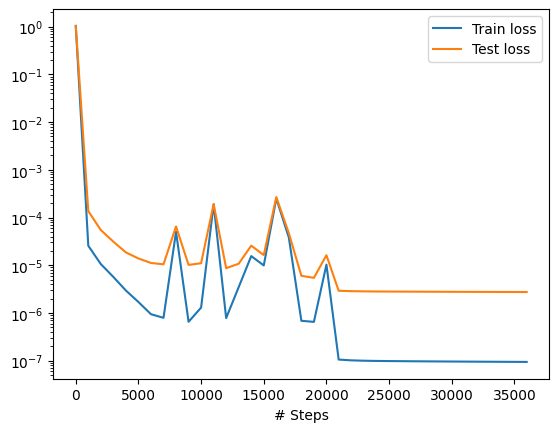

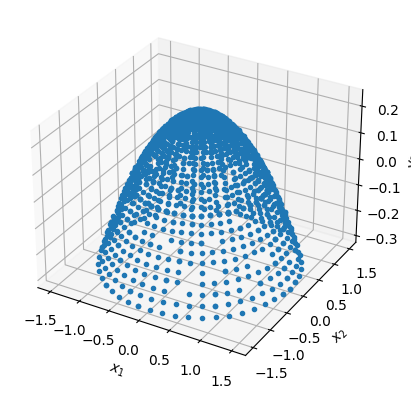

In [ ]:
# constrói o modelo
data = dde.data.PDE(geom, pde, u_circle_bc, num_domain=200, num_boundary=120, num_test=1500)
net = dde.nn.FNN([2] + [60] * 4 + [1], "tanh", "Glorot uniform")
model = dde.Model(data, net)

# a compilação usando adam e depois l-bfgs é para aumentar a precisão
model.compile("adam", lr=0.001)
model.train(iterations=20000)
model.compile("L-BFGS")
losshistory, train_state = model.train(iterations=50000)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

---
Imprime a solução no plano $x-y$

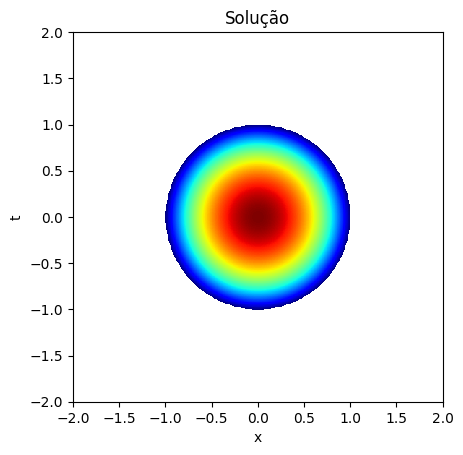

In [ ]:
x = np.linspace(-2, 2, 512)
t = np.linspace(-2, 2, 512)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
prediction = model.predict(X_star, operator=None)

v = griddata(X_star, prediction[:, 0], (X, T), method="cubic")

fig, ax = plt.subplots()
ax.set_title("Solução")
ax.set_ylabel("t")
ax.set_xlabel("x")
mask = (X**2+T**2<1)
v[~mask]=np.nan
ax.imshow(
    v,
    interpolation="nearest",
    cmap="jet",
    extent=[-2, 2, -2, 2],
    origin="lower",
    aspect="equal",
)
plt.show()